In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
movies=pd.read_csv("./src/ml-25m/movies.csv")
movies_links=pd.read_csv("./src/ml-25m/links.csv")

# Movies dataset:



In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
movies.info() # no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [5]:
movies.drop_duplicates() # no duplicates
len(movies.movieId.unique())

62423

**Create new column with year of the movie:**

In [6]:
movies["year"]=[y[-5:-1] for y in movies.title]
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [7]:
movies.year.value_counts()

2015    2513
2016    2488
2014    2403
2017    2374
2013    2164
        ... 
unis       1
minu       1
lett       1
 Mov       1
raum       1
Name: year, Length: 569, dtype: int64

In [8]:
movies_drop=movies[movies.year.str.match('^(?![0,1,2,3,4,5,6,7,8,9])')].index
movies.drop(movies_drop, inplace=True)
movies.year=movies.year.str.replace(")","")
movies.year=movies.year.str.replace("次求","")
movies.year=movies.year.str.replace(" & ","")

In [9]:
movies.year.value_counts()

2015    2513
2016    2488
2014    2403
2017    2374
2013    2164
        ... 
994        1
977        1
997        1
1874       1
938        1
Name: year, Length: 187, dtype: int64

In [10]:
movies["year"]=movies["year"].astype("int")
movies["year"].dtypes

dtype('int64')

**Merge Dataframe with IDMB and ThemovieDB Links:**

In [11]:
movies_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [12]:
movies_links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  62423 non-null  int64  
 1   imdbId   62423 non-null  int64  
 2   tmdbId   62316 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.4 MB


In [13]:
movies=pd.merge(movies,movies_links,on='movieId')
movies.head()

,movieId,title,genres,year,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,113228,15602.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,114885,31357.0
4,5,Father of the Bride Part II (1995),Comedy,1995,113041,11862.0


**Create list with different genres and then create a new dataframe with genres columns:**

In [14]:
genre_list = ""
for index,row in movies.iterrows():
        genre_list += row.genres + "|"
        
genre_list_split = genre_list.split('|')
genre_list_split= list(set(genre_list_split)) # eliminate duplicates
genre_list_split.remove('') #remove blanks
print(len(genre_list_split))
genre_list_split

20


['Musical',
 'War',
 'Film-Noir',
 'Thriller',
 'Crime',
 'Children',
 'Mystery',
 'Horror',
 'Comedy',
 'Documentary',
 'Sci-Fi',
 '(no genres listed)',
 'Western',
 'Adventure',
 'Fantasy',
 'Romance',
 'Animation',
 'IMAX',
 'Action',
 'Drama']

In [15]:
movies["genres"]=movies["genres"].str.replace('|',";")

In [16]:
movies_genres=movies.copy()
for genre in genre_list_split:
    movies_genres[genre]=movies_genres.apply(lambda _:int(genre in _.genres), axis = 1)

In [17]:
movies_genres.head()

,movieId,title,genres,year,imdbId,tmdbId,Musical,War,Film-Noir,Thriller,...,Sci-Fi,(no genres listed),Western,Adventure,Fantasy,Romance,Animation,IMAX,Action,Drama
0,1,Toy Story (1995),Adventure;Animation;Children;Comedy;Fantasy,1995,114709,862.0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,0
1,2,Jumanji (1995),Adventure;Children;Fantasy,1995,113497,8844.0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy;Romance,1995,113228,15602.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy;Drama;Romance,1995,114885,31357.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,5,Father of the Bride Part II (1995),Comedy,1995,113041,11862.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Ratings Dataset:

In [18]:
ratings=pd.read_csv("./src/ml-25m/ratings.csv")

In [19]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [20]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 762.9 MB


In [21]:
ratings.describe()

,userId,movieId,rating,timestamp
count,2.500010e+07,2.500010e+07,2.500010e+07,2.500010e+07
mean,8.118928e+04,2.138798e+04,3.533854e+00,1.215601e+09
std,4.679172e+04,3.919886e+04,1.060744e+00,2.268758e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,4.051000e+04,1.196000e+03,3.000000e+00,1.011747e+09
50%,8.091400e+04,2.947000e+03,3.500000e+00,1.198868e+09
75%,1.215570e+05,8.623000e+03,4.000000e+00,1.447205e+09
max,1.625410e+05,2.091710e+05,5.000000e+00,1.574328e+09


In [22]:
ratings.isnull().sum()#no null values

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [23]:
ratings["rating"].value_counts()

4.0    6639798
3.0    4896928
5.0    3612474
3.5    3177318
4.5    2200539
2.0    1640868
2.5    1262797
1.0     776815
1.5     399490
0.5     393068
Name: rating, dtype: int64

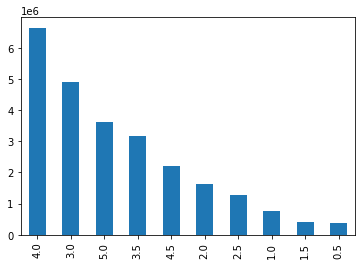

In [24]:
ratings["rating"].value_counts().plot.bar()

In [25]:
ratings.drop(columns="timestamp", inplace=True)
ratings.head()

,userId,movieId,rating
0,1,296,5.0
1,1,306,3.5
2,1,307,5.0
3,1,665,5.0
4,1,899,3.5


In [26]:
ratings=pd.merge(ratings,movies,on="movieId")

In [27]:
ratings.head()

,userId,movieId,rating,title,genres,year,imdbId,tmdbId
0,1,296,5.0,Pulp Fiction (1994),Comedy;Crime;Drama;Thriller,1994,110912,680.0
1,3,296,5.0,Pulp Fiction (1994),Comedy;Crime;Drama;Thriller,1994,110912,680.0
2,4,296,4.0,Pulp Fiction (1994),Comedy;Crime;Drama;Thriller,1994,110912,680.0
3,5,296,4.0,Pulp Fiction (1994),Comedy;Crime;Drama;Thriller,1994,110912,680.0
4,7,296,4.0,Pulp Fiction (1994),Comedy;Crime;Drama;Thriller,1994,110912,680.0


In [28]:
year_drop=ratings[(ratings.year<2000)].index
ratings.drop(year_drop,inplace=True)

In [29]:
ratings.drop(columns=["title","genres","year","imdbId","tmdbId"],inplace=True)

In [30]:
ratings.shape

(9584369, 3)

In [38]:
ratings.head()

,userId,movieId,rating
266883,1,3949,5.0
266884,19,3949,4.0
266885,33,3949,4.0
266886,38,3949,4.0
266887,50,3949,5.0


**Check if users have rated the same movie different times. In this case, we take the max rating:**

In [31]:
ratings_user=ratings.groupby(['userId','movieId']).aggregate(np.max)
len(ratings_user) # no duplicates ratings for the same user for an specific movie

9584369

**Count unique users:**

In [32]:
len(ratings['userId'].unique())

117551

**Percent of rating values:**

In [33]:
ratings_count = ratings.groupby('rating').count() # count num of users and movies with each rating
ratings_count

,userId,movieId
rating,,
0.5,216676,216676
1.0,246998,246998
1.5,207835,207835
2.0,543986,543986
2.5,658271,658271
3.0,1524554,1524554
3.5,1657967,1657967
4.0,2319261,2319261
4.5,1101012,1101012


In [34]:
ratings_count['total_percentage_rating']=round(ratings_count['userId']*100/ratings_count['userId'].sum(),1)
ratings_count

,userId,movieId,total_percentage_rating
rating,,,
0.5,216676,216676,2.3
1.0,246998,246998,2.6
1.5,207835,207835,2.2
2.0,543986,543986,5.7
2.5,658271,658271,6.9
3.0,1524554,1524554,15.9
3.5,1657967,1657967,17.3
4.0,2319261,2319261,24.2
4.5,1101012,1101012,11.5


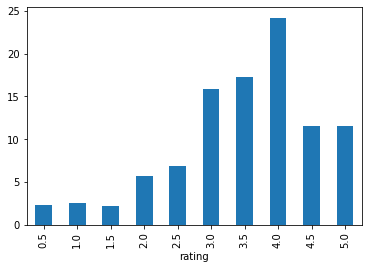

In [35]:
ratings_count['total_percentage_rating'].plot.bar()

**Find the number of ratings for each user and calculate the average rating for each user:**

In [36]:
user_rating_average = pd.DataFrame(ratings.groupby('userId')['rating'].agg(['count','mean']))
user_rating_average.head()

,count,mean
userId,,
1,28,3.803571
2,61,3.819672
3,571,3.630473
4,196,3.308673
10,11,3.181818


**Find the number of ratings for each movie and calculate the average rating for movie:**

In [37]:
movie_rating_average = pd.DataFrame(ratings.groupby('movieId')['rating'].agg(['count','mean']))
movie_rating_average.head()

,count,mean
movieId,,
2769,700,3.117143
3177,1315,2.843346
3190,1022,2.321918
3225,893,2.667413
3228,20,2.025000
